In [ ]:
#Data Source: PDFs parsed from https://coststudies.ucdavis.edu/current/commodities

In [1]:
pip install plotly


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python3.13 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install nbformat



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python3.13 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import plotly.express as px


In [2]:
df = pd.read_csv('UCD-data2.csv')


In [3]:
len(df)

224

In [4]:
df['true?'] = ((df['Labor Cost'] + df['Fuel'] + df['Lube & Repairs'] + df['Material Cost'] + df['Custom/Rent']) - df['Total Cost'])<2

In [5]:
filtered_df = df[df['true?'] == True]


In [6]:
df = pd.read_csv('UCD-data2.csv')
df['true?'] = ((df['Labor Cost'] + df['Fuel'] + df['Lube & Repairs'] + df['Material Cost'] + df['Custom/Rent']) - df['Total Cost'])<2
filtered_df = df[df['true?'] == True]
filtered_df.to_csv('check.csv')

In [7]:
times_df = filtered_df.groupby("Product", as_index=False)["Time (Hrs./Ac)"].mean()

In [8]:
filtered_df['Purpose']

0                              to ESTABLISH ORCHARDGRASS
1                                to PRODUCE ORCHARDGRASS
4                                                Unknown
5                                                Unknown
8                                                Unknown
                             ...                        
216    TO PRODUCE AND HARVEST BLACKBERRIES: PRODUCTIO...
217    TO PRODUCE AND HARVEST BLACKBERRIES: PRODUCTIO...
219                                              Unknown
221                                              Unknown
222                                              Unknown
Name: Purpose, Length: 95, dtype: object

In [9]:
filtered_df[filtered_df['Product'] =='corn']

,Unnamed: 0,Region,Year,Product,Purpose,Time (Hrs./Ac),Labor Cost,Fuel,Lube & Repairs,Material Cost,Custom/Rent,Total Cost,true?
131,131,SAN JOAQUIN VALLEY,2015,corn,TO PRODUCE GRAIN CORN,2.0,152.0,78.0,31.0,785.0,130.0,1204.0,True
134,134,SAN JOAQUIN VALLEY,2015,corn,TO PRODUCE SILAGE CORN CONSERVATION TILLAGE,1.0,141.0,7.0,2.0,516.0,547.0,1232.0,True
135,135,SAN JOAQUIN VALLEY,2015,corn,TO PRODUCE SILAGE CORN CONSERVATION TILLAGE,34.0,1.0,1.0,1.0,1.0,1.0,160.0,True
137,137,SACRAMENTO VALLEY AND NORTHERN SAN JOAQUIN VALLEY,2015,corn,TO PRODUCE FIELD CORN,3.0,173.0,84.0,46.0,738.0,54.0,1117.0,True
138,138,SACRAMENTO VALLEY AND NORTHERN SAN JOAQUIN VALLEY,2015,corn,TO PRODUCE FIELD CORN,77.0,0.0,0.0,0.0,10.0,10.0,185.0,True


In [10]:
filtered_df[filtered_df['Product'] =='oranges']

,Unnamed: 0,Region,Year,Product,Purpose,Time (Hrs./Ac),Labor Cost,Fuel,Lube & Repairs,Material Cost,Custom/Rent,Total Cost,true?
77,77,TABLE 3. COSTS PER ACRE TO PRODUCE ORANGES,Unknown,oranges,Unknown,4.36,482.0,20.0,12.0,1873.0,4144.0,6659.0,True


/var/folders/xj/3_cf3p513dxgf8tbpc4j_1j40000gn/T/ipykernel_17830/2051888399.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Product", y="Time (Hrs./Ac)", data=times_df, palette="viridis")


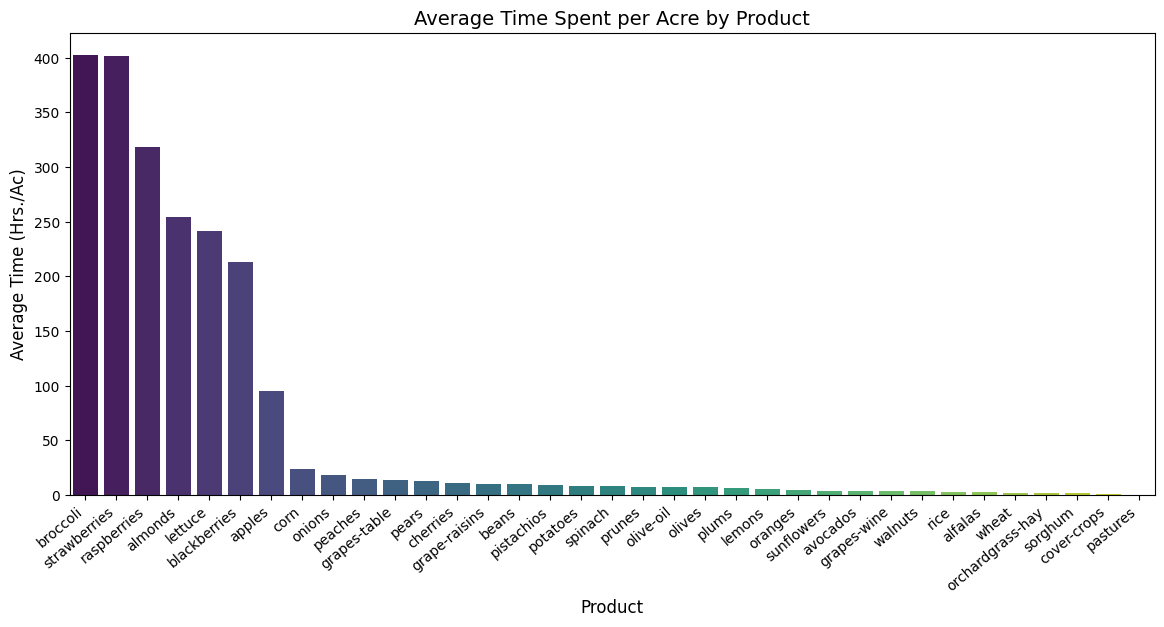

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

times_df = times_df.sort_values(by="Time (Hrs./Ac)", ascending=False)
plt.figure(figsize=(14, 6))
sns.barplot(x="Product", y="Time (Hrs./Ac)", data=times_df, palette="viridis")

plt.xlabel("Product", fontsize=12)
plt.ylabel("Average Time (Hrs./Ac)", fontsize=12)
plt.title("Average Time Spent per Acre by Product", fontsize=14)
plt.xticks(rotation=40, ha="right")  

plt.show()

In [12]:
cost_df = filtered_df.groupby("Product", as_index=False)[["Labor Cost", "Total Cost"]].sum()


/var/folders/xj/3_cf3p513dxgf8tbpc4j_1j40000gn/T/ipykernel_17830/1501240251.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Product", y="Ratio", data=cost_df, palette="coolwarm")


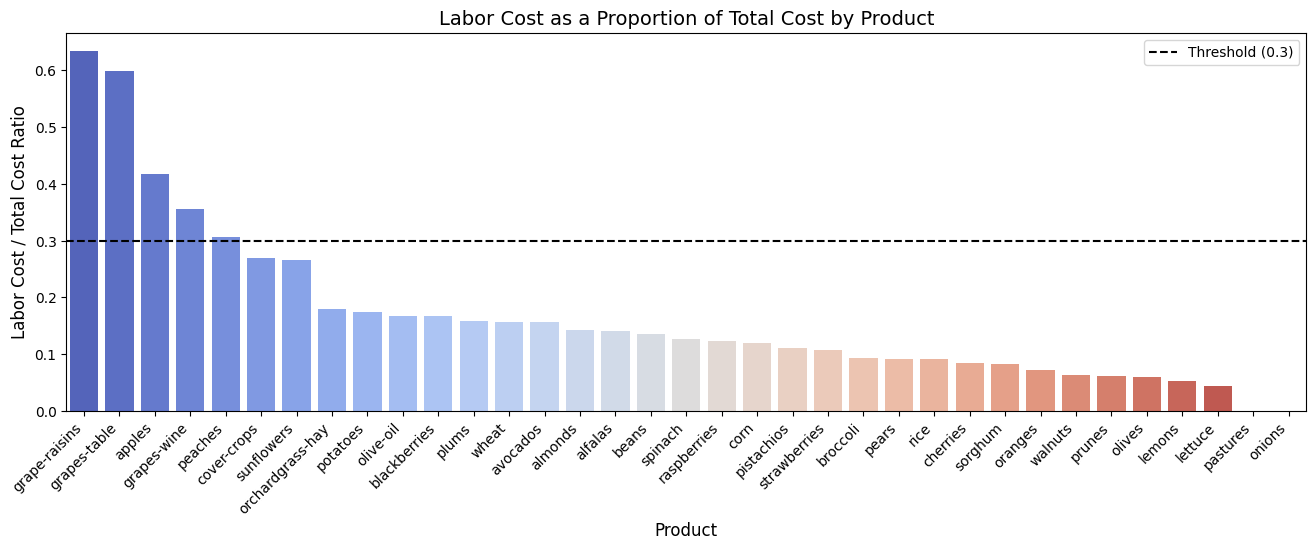

In [13]:
# new
import matplotlib.pyplot as plt
import seaborn as sns

cost_df["Ratio"] = cost_df["Labor Cost"] / cost_df["Total Cost"]
cost_df = cost_df.sort_values(by="Ratio", ascending=False)

plt.figure(figsize=(16, 6))
ax = sns.barplot(x="Product", y="Ratio", data=cost_df, palette="coolwarm")
plt.axhline(y=0.3, color='black', linestyle='dashed', linewidth=1.5, label="Threshold (0.3)")
plt.xticks(rotation=45, ha="right", fontsize=10)  
plt.subplots_adjust(bottom=0.25)  

plt.xlabel("Product", fontsize=12)
plt.ylabel("Labor Cost / Total Cost Ratio", fontsize=12)
plt.title("Labor Cost as a Proportion of Total Cost by Product", fontsize=14)
plt.legend()

plt.show()

/var/folders/xj/3_cf3p513dxgf8tbpc4j_1j40000gn/T/ipykernel_17830/4015905351.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Product", y="Ratio", data=cost_df, palette="coolwarm")


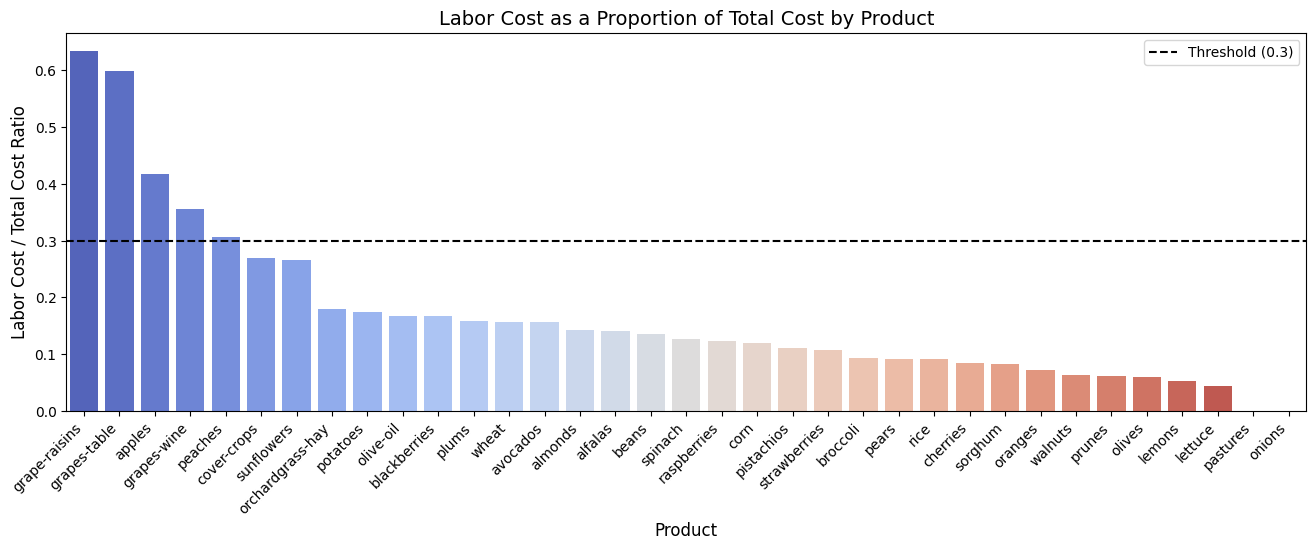

In [14]:
#no field crops. bean, alfalas, etc

# old
import matplotlib.pyplot as plt
import seaborn as sns

cost_df["Ratio"] = cost_df["Labor Cost"] / cost_df["Total Cost"]
cost_df = cost_df.sort_values(by="Ratio", ascending=False)

plt.figure(figsize=(16, 6))
ax = sns.barplot(x="Product", y="Ratio", data=cost_df, palette="coolwarm")
plt.axhline(y=0.3, color='black', linestyle='dashed', linewidth=1.5, label="Threshold (0.3)")
plt.xticks(rotation=45, ha="right", fontsize=10)  
plt.subplots_adjust(bottom=0.25)  

plt.xlabel("Product", fontsize=12)
plt.ylabel("Labor Cost / Total Cost Ratio", fontsize=12)
plt.title("Labor Cost as a Proportion of Total Cost by Product", fontsize=14)
plt.legend()

plt.show()

In [15]:
cost_df

,Product,Labor Cost,Total Cost,Ratio
10,grape-raisins,3108.00,4900.00,0.634286
11,grapes-table,49399.00,82469.00,0.599001
2,apples,4725.00,11293.00,0.418401
12,grapes-wine,9009.00,25267.00,0.356552
21,peaches,3423.00,11153.00,0.306913
9,cover-crops,42.00,156.00,0.269231
32,sunflowers,268.00,1005.00,0.266667
19,orchardgrass-hay,159.00,882.00,0.180272
25,potatoes,1052.58,6033.66,0.174451
15,olive-oil,186.00,1115.00,0.166816


In [16]:
#articles in full review that had mixed votes previously

In [17]:
cost_df
#come up with weighted score, including acrage per crop and stuff. production per state? indicators for labor intensiveness

#look into social deprivation index

#https://www.graham-center.org/maps-data-tools/social-deprivation-index.html
"""
https://www.graham-center.org/maps-data-tools/social-deprivation-index.html
    take a bunch of data (like %undereducated, % of ppl living in bad housing, unemployed%), normalize it
    Apply factor analysis (dimension reducing technique, look for latent variance between variables)
    factor analysis basically report a weight of importance, which we multiply with z score to find fianl
    


The idea is that
social deprivation -> undereducation, bad housing, enemployment, etc
    
However, social deprivation is more abstraction of an index, cannot be measured

So we look at quantifiable values we believe is associated with it

? -> undereducation, bad housing, enemployment, etc
Then we work backwards to find social deprivation


So something similar with this?

labor intensivity -> ratio of labor to machine/total cost, number of workers, worker compensation, workers per acre



then we work backwards

How could we apply this to farm labor?
    1. find variables associated with manual labor (assuming the latent)
    
#how labor intensive a states labor intensivity is?

ratio of cost: calculate with acrage of various crops per state
    
    
    
"""

'\nhttps://www.graham-center.org/maps-data-tools/social-deprivation-index.html\n    take a bunch of data (like %undereducated, % of ppl living in bad housing, unemployed%), normalize it\n    Apply factor analysis (dimension reducing technique, look for latent variance between variables)\n    factor analysis basically report a weight of importance, which we multiply with z score to find fianl\n    \n\n\nThe idea is that\nsocial deprivation -> undereducation, bad housing, enemployment, etc\n    \nHowever, social deprivation is more abstraction of an index, cannot be measured\n\nSo we look at quantifiable values we believe is associated with it\n\n? -> undereducation, bad housing, enemployment, etc\nThen we work backwards to find social deprivation\n\n\nSo something similar with this?\n\nlabor intensivity -> ratio of labor to machine/total cost, number of workers, worker compensation, workers per acre\n\n\n\nthen we work backwards\n\nHow could we apply this to farm labor?\n    1. find var

In [18]:
#read in xiaoyu's number of workers

In [19]:
data = {}
years = [2012, 2013, 2014, 2015, 2016 ,2017, 2018, 2019, 2020, 2021, 2022, 2023]
crop_to_products = {
    'GRAPES': ['grapes-table', 'grape-raisins', 'grapes-wine'],
    'APPLES': ['apples'],
    'GRAPES': ['grapes-table', 'grape-raisins', 'grapes-wine'],
    'RASPBERRIES': ['raspberries'],
    'PLUMS': ['plums'],
    'BLACKBERRIES': ['blackberries'],
    'PEACHES': ['peaches'],
    'CHERRIES': ['cherries'],
    'WHEAT': ['wheat'],
    'OLIVES': ['olives', 'olive-oil'],
    'BROCCOLI': ['broccoli'],
    'SUNFLOWER': ['sunflowers'],
    'LEMONS': ['lemons'],
    'BEANS': ['beans'],
    'AVOCADOS': ['avocados'],
    'POTATOES': ['potatoes'],
    'CORN': ['corn'],
    'ORANGES': ['oranges'],
    'ALMONDS': ['almonds'],
    'SPINACH': ['spinach'],
    'LETTUCE': ['lettuce'],
    'PISTACHIOS': ['pistachios'],
    'PRUNES': ['prunes'],
    'TOMATOES': ['tomatoes'],
    'PEARS': ['pears'],
    'SORGHUM': ['sorghum'],
    'WALNUTS': ['walnuts'],
    'RICE': ['rice']
}
columns_to_keep = ['state_name'] + list(crop_to_products.keys())


for year in years:
    df = pd.read_csv(f"../USDAstats/norm-data/{year}_summed.csv")
    filtered_columns = [col for col in columns_to_keep if col in df.columns]
    data[year] = df[filtered_columns]

In [20]:
"""perennial crops: live and produce for multiple years
annual crops: replanted every year

we should use area bearing for perennial crops,
and area harvested for annual crops
"""



crop_lifecycle = {
    'GRAPES': 'perennial',
    'APPLES': 'perennial',
    'RASPBERRIES': 'perennial',
    'PLUMS': 'perennial',
    'BLACKBERRIES': 'perennial',
    'PEACHES': 'perennial',
    'CHERRIES': 'perennial',
    'WHEAT': 'annual',
    'OLIVES': 'perennial',
    'BROCCOLI': 'annual',
    'SUNFLOWER': 'annual',
    'LEMONS': 'perennial',
    'BEANS': 'annual',
    'AVOCADOS': 'perennial',
    'POTATOES': 'annual',
    'CORN': 'annual',
    'ORANGES': 'perennial',
    'ALMONDS': 'perennial',
    'SPINACH': 'annual',
    'LETTUCE': 'annual',
    'PISTACHIOS': 'perennial',
    'PRUNES': 'perennial',
    'TOMATOES': 'annual',
    'PEARS': 'perennial',
    'SORGHUM': 'annual',
    'WALNUTS': 'perennial',
    'RICE': 'annual'
}


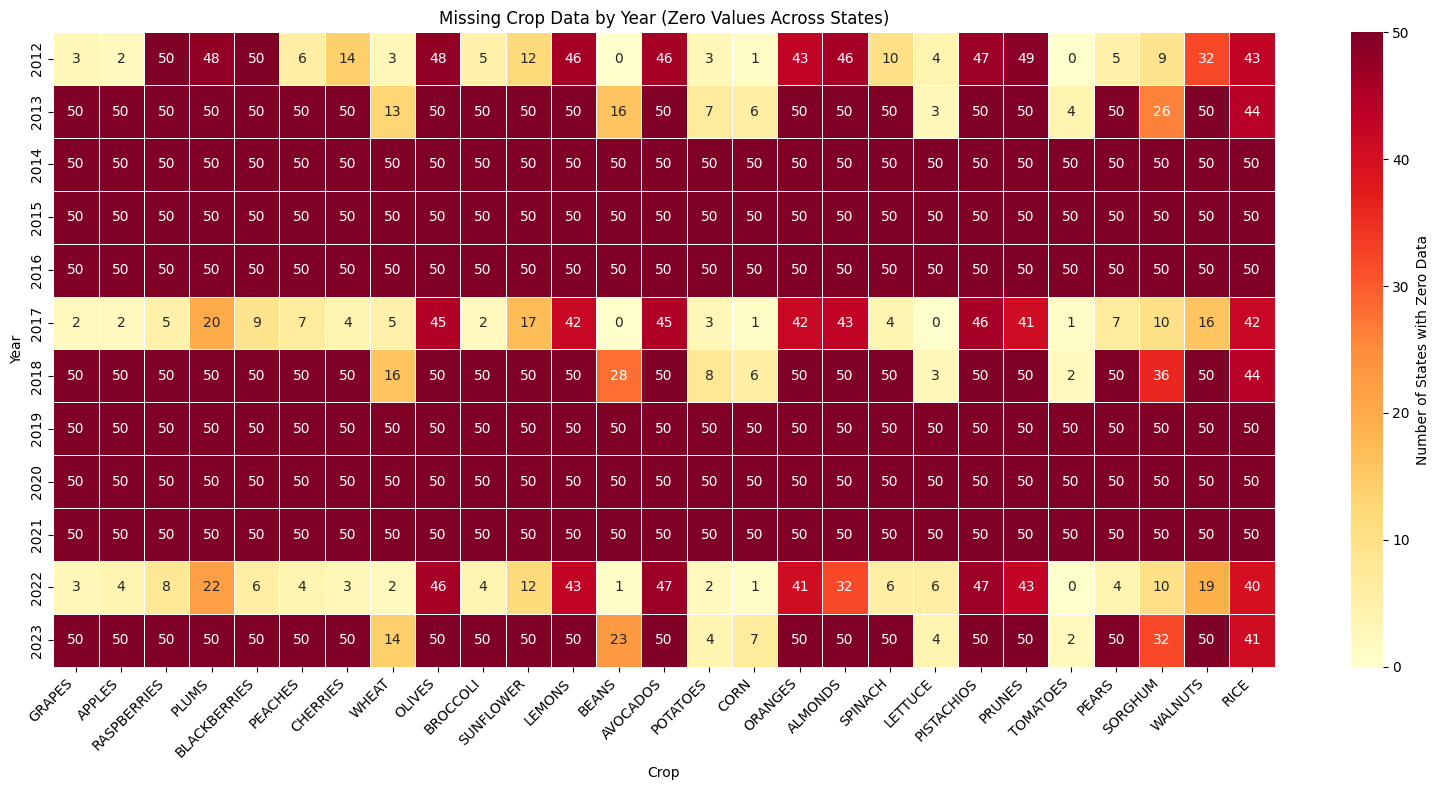

In [21]:
missing_counts = {}

for year, df in data.items():
    df = df.copy()

    # If df is empty, simulate 50 rows (1 per state) with zeros
    if df.empty:
        df = pd.DataFrame(columns=columns_to_keep)
        df['state_name'] = [f'State {i+1}' for i in range(50)]  # Placeholder state names
        for col in columns_to_keep:
            if col != 'state_name':
                df[col] = 0
    else:
        # Ensure all expected columns are present
        for col in columns_to_keep:
            if col not in df.columns:
                df[col] = 0

    # Keep only the relevant columns
    df = df[columns_to_keep]

    # Count zero values per crop (excluding 'state_name')
    zero_counts = (df.drop(columns='state_name') == 0).sum()
    missing_counts[year] = zero_counts

# Continue as before...
missing_df = pd.DataFrame(missing_counts).T
missing_df = missing_df.loc[:, missing_df.sum().sort_values(ascending=False).index]
missing_df = missing_df.fillna(0).astype(int)

# Reorder and plot
ordered_crops = list(crop_to_products.keys())
missing_df = missing_df[ordered_crops]

plt.figure(figsize=(16, 8))
sns.heatmap(
    missing_df,
    cmap='YlOrRd',
    annot=True,
    fmt='d',
    linewidths=0.5,
    cbar_kws={'label': 'Number of States with Zero Data'}
)
plt.title("Missing Crop Data by Year (Zero Values Across States)")
plt.xlabel("Crop")
plt.ylabel("Year")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [22]:
current_data = data[2017]

In [23]:
cost_df = cost_df.drop(index =9)
cost_df = cost_df.drop(index = 11)

In [24]:
crop_to_products = {
    'GRAPES': ['grapes-table', 'grape-raisins', 'grapes-wine'],
    'APPLES': ['apples'],
    'GRAPES': ['grapes-table', 'grape-raisins', 'grapes-wine'],
    'RASPBERRIES': ['raspberries'],
    'PLUMS': ['plums'],
    'BLACKBERRIES': ['blackberries'],
    'PEACHES': ['peaches'],
    'CHERRIES': ['cherries'],
    'WHEAT': ['wheat'],
    'OLIVES': ['olives', 'olive-oil'],
    'BROCCOLI': ['broccoli'],
    'SUNFLOWER': ['sunflowers'],
    'LEMONS': ['lemons'],
    'BEANS': ['beans'],
    'AVOCADOS': ['avocados'],
    'POTATOES': ['potatoes'],
    'CORN': ['corn'],
    'ORANGES': ['oranges'],
    'ALMONDS': ['almonds'],
    'SPINACH': ['spinach'],
    'LETTUCE': ['lettuce'],
    'PISTACHIOS': ['pistachios'],
    'PRUNES': ['prunes'],
    'TOMATOES': ['tomatoes'],
    'PEARS': ['pears'],
    'SORGHUM': ['sorghum'],
    'WALNUTS': ['walnuts'],
    'RICE': ['rice']
}

In [25]:
product_to_crop = {
    product: crop
    for crop, products in crop_to_products.items()
    for product in products
}

# Map the Product column to Crop
cost_df['Crop'] = cost_df['Product'].map(product_to_crop)

In [26]:
transform_data = current_data.copy()

for _, row in cost_df.iterrows():
    crop = row['Crop']
    ratio = row['Ratio']
    
    if crop in transform_data.columns:
        transform_data[crop] *= ratio

transform_data['total_value'] = transform_data.drop(columns='state_name').sum(axis=1)


In [27]:
import plotly.io as pio

pio.renderers.default = 'browser'
state_abbrev = {
    'ALABAMA': 'AL', 'ALASKA': 'AK', 'ARIZONA': 'AZ', 'ARKANSAS': 'AR',
    'CALIFORNIA': 'CA', 'COLORADO': 'CO', 'CONNECTICUT': 'CT', 'DELAWARE': 'DE',
    'FLORIDA': 'FL', 'GEORGIA': 'GA', 'HAWAII': 'HI', 'IDAHO': 'ID', 'ILLINOIS': 'IL',
    'INDIANA': 'IN', 'IOWA': 'IA', 'KANSAS': 'KS', 'KENTUCKY': 'KY', 'LOUISIANA': 'LA',
    'MAINE': 'ME', 'MARYLAND': 'MD', 'MASSACHUSETTS': 'MA', 'MICHIGAN': 'MI',
    'MINNESOTA': 'MN', 'MISSISSIPPI': 'MS', 'MISSOURI': 'MO', 'MONTANA': 'MT',
    'NEBRASKA': 'NE', 'NEVADA': 'NV', 'NEW HAMPSHIRE': 'NH', 'NEW JERSEY': 'NJ',
    'NEW MEXICO': 'NM', 'NEW YORK': 'NY', 'NORTH CAROLINA': 'NC', 'NORTH DAKOTA': 'ND',
    'OHIO': 'OH', 'OKLAHOMA': 'OK', 'OREGON': 'OR', 'PENNSYLVANIA': 'PA',
    'RHODE ISLAND': 'RI', 'SOUTH CAROLINA': 'SC', 'SOUTH DAKOTA': 'SD', 'TENNESSEE': 'TN',
    'TEXAS': 'TX', 'UTAH': 'UT', 'VERMONT': 'VT', 'VIRGINIA': 'VA', 'WASHINGTON': 'WA',
    'WEST VIRGINIA': 'WV', 'WISCONSIN': 'WI', 'WYOMING': 'WY'
}
transform_data['state_code'] = transform_data['state_name'].map(state_abbrev)

# Drop rows where state_code is missing (just in case)
transform_data = transform_data.dropna(subset=['state_code'])

# Create choropleth
fig = px.choropleth(
    transform_data,
    locations='state_code',
    locationmode="USA-states",
    color='total_value',
    scope="usa",
    color_continuous_scale=[[0, 'white'], [1, 'red']],  # or 'Blues', 'Reds', 'Plasma', etc.
    labels={'total_value': 'Total Value'},
    title="Acrage * Labor cost ratio in the united states"
)

fig.show()

In [28]:
current_data['total_acreage'] = current_data.drop(columns='state_name').sum(axis=1)

transform_data['normalzied_value'] = transform_data['total_value'] /  current_data.drop(columns='state_name').sum(axis=1)

In [29]:
#normalized by total acrage

# Create choropleth
fig = px.choropleth(
    transform_data,
    locations='state_code',
    locationmode="USA-states",
    color='normalzied_value',
    scope="usa",
    color_continuous_scale=[[0, 'white'], [1, 'red']],  # or 'Blues', 'Reds', 'Plasma', etc.
    labels={'normalzied_value': 'Total Value'},
    title="Acrage * Labor cost ratio in the united states"
)

fig.show()

In [30]:
variables = transform_data[['state_name','normalzied_value']]


In [31]:
import pandas as pd

# Read CSV (handle commas in numbers)
labor_df = pd.read_csv("Labor2022(in).csv", thousands=',')
labor_df.head()

labor_df.columns = [
    'State', 'Year', 'HiredLabor',
    'Workers_150plus', 'Workers_less150',
    'ReportedOnly_150plus', 'ReportedOnly_less150',
    'ReportedBoth_150plus', 'ReportedBoth_less150',
    'MigrantWorkers', 'UnpaidWorkers'
]

labor_df['TotalWorkers'] = (
    labor_df['Workers_150plus'] +
    labor_df['Workers_less150']
)

# Proportion of long-term vs short-term workers
labor_df['Pct_LongTerm'] = labor_df['Workers_150plus'] / labor_df['TotalWorkers']

# Migrant worker share
labor_df['Pct_Migrant'] = labor_df['MigrantWorkers'] / labor_df['TotalWorkers']

# Unpaid worker share
labor_df['Pct_Unpaid'] = labor_df['UnpaidWorkers'] / (labor_df['UnpaidWorkers'] + labor_df['HiredLabor'])


In [32]:
import us  # pip install us

# Create 2-letter codes from full state names
labor_df['state_code'] = labor_df['State'].apply(lambda x: us.states.lookup(x).abbr if us.states.lookup(x) else None)

In [33]:
import plotly.express as px

variables = {
    'Pct_Migrant': 'Percent Migrant Workers',
}

for var, label in variables.items():
    fig = px.choropleth(
        labor_df,
        locations='state_code',
        locationmode="USA-states",
        color=var,
        scope="usa",
        color_continuous_scale=[[0, 'white'], [1, 'red']],
        labels={var: label},
        title=f"{label} by State (2022)"
    )
    fig.show()


In [34]:
factors = transform_data[['state_name','state_code','normalzied_value']]

In [35]:
import pandas as pd

# Select only the relevant columns from labor_df
labor_selected = labor_df[['state_code', 'Pct_Migrant']]

# Merge with factor on 'state_code'
merged_df = pd.merge(
    factors,
    labor_selected,
    on='state_code',
    how='inner'   # or 'left' if you want to keep all from factor
)

# Check result
print(merged_df.head())


   state_name state_code  normalzied_value  Pct_Migrant
0     ALABAMA         AL          0.065235     0.113340
1      ALASKA         AK          0.083223     0.083422
2     ARIZONA         AZ          0.056918     0.116852
3    ARKANSAS         AR          0.055515     0.099886
4  CALIFORNIA         CA          0.099871     0.195924


In [36]:
merged_df['workers_per_acre'] = labor_df['TotalWorkers'] / current_data['total_acreage']

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import pandas as pd

# Select all relevant quantitative variables workers_per_acre
X = merged_df[['normalzied_value', 'Pct_Migrant', 'workers_per_acre']]

# Standardize (important since they’re on different scales)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Run PCA
pca = PCA(n_components=1)  # first principal component as your index
pc_scores = pca.fit_transform(X_scaled)

# Add PCA result back to the dataframe
merged_df['Labor_Intensity_Index'] = pc_scores

# Optional: normalize index to 0–1 range for interpretability
merged_df['Labor_Intensity_Index'] = MinMaxScaler().fit_transform(
    merged_df[['Labor_Intensity_Index']]
)

# View loadings (contribution of each variable)
loadings = pd.Series(
    pca.components_[0],
    index=X.columns,
    name='Loading'
)

print("PCA Loadings (variable contributions):")
print(loadings)
print()

# Top states by composite labor intensity
print(merged_df[['state_name', 'Labor_Intensity_Index']].sort_values(
    'Labor_Intensity_Index', ascending=False).head(10))

#remove pct_shortTerm
#remove unpaid
# add acres per worker
# add productivity per worker (as a function of profitability)

# trie 2 things. measure productivity as function of profit. also evaluate against total cash reciepts (how much sold)

PCA Loadings (variable contributions):
normalzied_value    0.701787
Pct_Migrant        -0.055905
workers_per_acre    0.710190
Name: Loading, dtype: float64

       state_name  Labor_Intensity_Index
1          ALASKA               1.000000
10         HAWAII               0.722848
20  MASSACHUSETTS               0.609256
38   RHODE ISLAND               0.434734
4      CALIFORNIA               0.427273
6     CONNECTICUT               0.358429
46     WASHINGTON               0.259990
18          MAINE               0.255501
29     NEW JERSEY               0.253256
28  NEW HAMPSHIRE               0.217901


In [53]:
import plotly.express as px

# Invert the PCA-based index
merged_df['Labor_Intensity_Index_Inverse'] = merged_df['Labor_Intensity_Index']

# Normalize it to 0–1 for consistent color scaling
merged_df['Labor_Intensity_Index_Inverse'] = (
    merged_df['Labor_Intensity_Index_Inverse'] - merged_df['Labor_Intensity_Index_Inverse'].min()
) / (
    merged_df['Labor_Intensity_Index_Inverse'].max() - merged_df['Labor_Intensity_Index_Inverse'].min()
)

# Create the choropleth map
fig = px.choropleth(
    merged_df,
    locations='state_code',
    locationmode='USA-states',
    color='Labor_Intensity_Index_Inverse',
    hover_name='state_name',
    hover_data={
        'normalzied_value': ':.3f',
        'workers_per_acre': ':.3f',
        'Pct_Migrant': ':.3f',
    },
    color_continuous_scale=['white', 'red'],  # white → red gradient
    range_color=(0, 1),
    scope='usa',
    title='Labor Intensivity Index by State (Inverted PCA Values)'
)

fig.show()


In [85]:
pip install factor_analyzer

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42655 sha256=9a9ece7909a4a1aaf0006b79f40ccf0f28cce17a5299f3dca866a2233f4239ed
  Stored in directory: /Users/yueranjia/Library/Caches/pip/wheels/87/6e/8f/914f20e0242ee0214e5c8336031a2fab12e632e4695fbb7276
Successfully built factor_analyzer

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python3.13 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [43]:
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
import pandas as pd

# Select your variables
X = merged_df[['normalzied_value', 'Pct_Migrant', 'workers_per_acre']]

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit factor analysis (1 latent factor)
fa = FactorAnalyzer(n_factors=1, rotation=None)
fa.fit(X_scaled)

# Extract factor loadings
loadings = pd.Series(fa.loadings_.flatten(), index=X.columns, name='FA_Loading')

# Compute factor scores for each state
merged_df['FA_Score'] = fa.transform(X_scaled)

# Optional: normalize scores to 0–1 for easier mapping
merged_df['FA_Score_norm'] = (merged_df['FA_Score'] - merged_df['FA_Score'].min()) / (
    merged_df['FA_Score'].max() - merged_df['FA_Score'].min()
)
print("Factor Loadings:")
print(loadings)


Factor Loadings:
normalzied_value   -0.472475
Pct_Migrant         0.053197
workers_per_acre   -0.999472
Name: FA_Loading, dtype: float64


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



In [49]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
import plotly.express as px

# Filter out Alaska (AK)
merged_df_filtered = merged_df[~merged_df['state_code'].isin(['AK', 'HI'])].copy()

# Select relevant variables
X = merged_df_filtered[['normalzied_value', 'Pct_Migrant', 'workers_per_acre']]

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Factor Analysis (1 latent factor)
fa = FactorAnalyzer(n_factors=1, rotation=None)
fa.fit(X_scaled)

# Extract loadings
loadings = pd.Series(fa.loadings_.flatten(), index=X.columns, name='FA_Loading')
print("Factor Loadings:")
print(loadings)

# Compute factor scores
merged_df_filtered['FA_Score'] = fa.transform(X_scaled)

# Normalize scores
merged_df_filtered['FA_Score_norm'] = (
    (merged_df_filtered['FA_Score'] - merged_df_filtered['FA_Score'].min()) /
    (merged_df_filtered['FA_Score'].max() - merged_df_filtered['FA_Score'].min())
)

# Invert scale (so higher = more labor intensive)
merged_df_filtered['FA_Score_norm_inv'] = 1 - merged_df_filtered['FA_Score_norm']

# Choropleth (white → red)
fig = px.choropleth(
    merged_df_filtered,
    locations='state_code',
    locationmode='USA-states',
    color='FA_Score_norm_inv',
    scope='usa',
    color_continuous_scale=['white', 'red'],
    labels={'FA_Score_norm_inv': 'Labor Intensivity (FA, inverted)'},
    title='U.S. Labor Intensivity Index (Factor Analysis, Inverted Scale)',
)

fig.show()


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



Factor Loadings:
normalzied_value   -1.001300
Pct_Migrant        -0.074824
workers_per_acre   -0.697341
Name: FA_Loading, dtype: float64


What all of this suggests

This suggests our intensitivty models farms from two dimensions.
One one axis, we have smaller scale farms mostly using family unpaid labor, prehaps subsistence.

While on the other axis, we have large commercial farms relying on migrant labors

In [34]:
current_data.to_csv('current_data.csv', index=False)

In [ ]:
#normalized by total acrage
drop_crops = ['CORN', 'WHEAT', 'BEANS', 'SORGHUM', 'RICE', 'SUNFLOWER', 'POTATOES']
current_dropped_data = transform_data.drop(columns=drop_crops)
current_dropped_data['total_value'] = current_dropped_data.drop(columns=['state_name', 'state_code']).sum(axis=1)
current_dropped_data['normalzied_value'] = current_dropped_data['total_value'] /  current_dropped_data.drop(columns=['state_name', 'state_code']).sum(axis=1)



# Create choropleth
fig = px.choropleth(
    current_dropped_data,
    locations='state_code',
    locationmode="USA-states",
    color='total_value',
    scope="usa",
    color_continuous_scale=[[0, 'white'], [1, 'red']],  # or 'Blues', 'Reds', 'Plasma', etc.
    labels={'normalzied_value': 'Total Value'},
    title="Acrage * Labor cost ratio in the united states, no corn or wheat"
)

fig.show()

In [38]:
current_dropped_data

,state_name,GRAPES,APPLES,RASPBERRIES,PLUMS,BLACKBERRIES,PEACHES,CHERRIES,OLIVES,BROCCOLI,...,SPINACH,LETTUCE,PISTACHIOS,PRUNES,TOMATOES,PEARS,WALNUTS,total_value,state_code,normalzied_value
0,ALABAMA,115.113330,87.445763,0.857831,7.798786,20.318376,827.437281,0.425389,0.000000,1.770037,...,0.127068,0.832980,0.000000,0.000000,2804.0,42.177367,0.063004,8.827636e+04,AL,0.957592
1,ALASKA,0.000000,5.439210,1.593115,0.000000,0.000000,0.000000,0.170155,0.000000,5.123790,...,0.381204,3.551125,0.000000,0.000000,10.0,0.000000,0.000000,1.592497e+02,AK,0.857681
2,ARIZONA,302.822690,205.016382,0.490189,1.591589,1.665441,36.829553,0.255233,0.000000,869.087992,...,1550.228793,3174.573967,551.411838,0.000000,122.0,8.068714,0.000000,5.808569e+04,AZ,0.888784
3,ARKANSAS,179.567749,69.454529,1.470568,0.636636,71.947035,322.258585,0.340311,0.000000,0.745279,...,1.143611,1.315231,0.000000,0.000000,1904.0,3.484217,0.126008,3.307970e+05,AR,0.992331
4,CALIFORNIA,197041.455255,5104.489507,1411.867785,1859.135052,335.586286,24139.316417,2765.537053,390.459333,10193.827351,...,6146.784231,10967.144491,26866.576947,2797.990610,506534.0,1902.932789,21614.327011,2.303154e+06,CA,0.696047
5,COLORADO,199.243309,505.428141,5.514630,5.570561,2.331617,1443.718461,26.544255,0.000000,12.203937,...,14.104541,105.086987,0.000000,0.183099,620.0,27.782049,0.063004,8.881984e+05,CO,0.996669
6,CONNECTICUT,80.511485,769.439033,14.215490,5.570561,3.164337,198.265758,0.765700,0.000000,5.775909,...,0.000000,5.699336,0.000000,0.000000,821.0,15.770668,0.000000,7.186207e+03,CT,0.789125
7,DELAWARE,10.855481,0.000000,0.980379,0.000000,0.000000,0.000000,0.000000,0.000000,3.912713,...,1.143611,0.394569,0.000000,0.000000,208.0,0.000000,0.000000,6.733910e+04,DE,0.996664
8,FLORIDA,261.662325,21.338440,1.102926,0.000000,31.143740,555.205505,0.170155,0.000000,122.691487,...,97.461105,408.116295,0.000000,0.000000,58272.0,3.850977,0.189012,2.715005e+05,FL,0.696535
9,GEORGIA,420.876047,233.467635,0.980379,0.000000,136.233043,6059.075226,0.170155,0.750067,29.438504,...,0.000000,2.104370,0.000000,0.000000,5296.0,9.352373,0.252017,1.359525e+05,GA,0.917711


In [36]:
# Create choropleth
fig = px.choropleth(
    current_dropped_data,
    locations='state_code',
    locationmode="USA-states",
    color='normalzied_value',
    scope="usa",
    color_continuous_scale=[[0, 'white'], [1, 'red']],  # or 'Blues', 'Reds', 'Plasma', etc.
    labels={'normalzied_value': 'Total Value'},
    title="Acrage * Labor cost ratio in the united states, no corn or wheat, normalized for acrage"
)

fig.show()

In [ ]:
"""
What is next?

run factor analysis on the following variables
1. lobor - total cost ratio by crop, multiplied with acrage per state
2. inverse mechanization index per state
3. labor hour - acrage ratio by crop, multiplied by acrage per state
4. H2A worker count per state

total cultural costs, total operation/acre costs, or harvest cost?

"""

In [ ]:
#national agricultural labor survey